In [196]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import norm, uniform

In [197]:
mydata = pd.read_csv("../data/diet_and_atp.tsv", sep="\t", header=0)

In [198]:
initial_guess_prot = standing_at_prot = 1
initial_guess_carbo = standing_at_carbo = 1
initial_guess_fat = standing_at_fat = 1

std_prot = mydata.Protein.std()
std_carbo = mydata.Carbohydrates.std()
std_fat = mydata.Fat.std()
std_atp = mydata.ATP.std()

In [199]:
print (std_atp)

2.2782213675286314


In [200]:
def p_step(prot, carbo, fat):
    
    good = 0.0
    all = 0.0
    
    for i, r in mydata.iterrows():
        
        eq = r.Protein * prot + r.Carbohydrates * carbo + r.Fat * fat 
        
        if eq > r.ATP - std_atp/5 and eq < r.ATP + std_atp/5:
            good+=1
        
        all +=1
    
    return good / all

In [201]:
# I want to obtain the posterior distribution of my samples

iterations = 50000
all_my_steps = [] # Just a record of what step I made each time 
all_my_standings = [] # Here I will record my posterior distribution,

for i in range(iterations):
    # I will move randomly, forward or backwards in each dimension, at a maximun distance of 0.5
    step_prot = (uniform(0,1).rvs() - 0.5) / 10
    step_carbo = (uniform(0,1).rvs() - 0.5)  / 10
    step_fat = (uniform(0,1).rvs() - 0.5)  / 10
    
    # The step that I will decide if I accept it or not
    candidate_prot = standing_at_prot + step_prot if standing_at_prot + step_prot > 0 else standing_at_prot - step_prot  
    candidate_carbo = standing_at_carbo + step_carbo if standing_at_carbo + step_carbo > 0 else standing_at_carbo - step_carbo  
    candidate_fat = standing_at_fat + step_fat if standing_at_fat + step_fat > 0 else standing_at_fat - step_fat  
    
    p_actual_step = p_step(standing_at_prot, standing_at_carbo, standing_at_fat)
    p_candidate_step = p_step(candidate_prot, candidate_carbo, candidate_fat)
    
    # If the new step is better, I always accept
    if p_candidate_step > p_actual_step:
        standing_at_prot = candidate_prot 
        standing_at_carbo = candidate_carbo
        standing_at_fat = candidate_fat 
    else:
        # If not, I accept it randomly
        random_number = uniform(0,1).rvs()
        if random_number <= p_candidate_step / p_actual_step:
            standing_at_prot = candidate_prot 
            standing_at_carbo = candidate_carbo
            standing_at_fat = candidate_fat 

    # I record my step and where I'm standing
    all_my_standings.append( ( standing_at_prot, standing_at_carbo, standing_at_fat) )
    all_my_steps.append( (step_prot, step_carbo, step_fat) )

In [202]:
all_my_standings_prot = [a[0] for a in all_my_standings]
all_my_standings_carbo = [a[1] for a in all_my_standings]
all_my_standings_fat = [a[2] for a in all_my_standings]

print (np.mean(all_my_standings_prot))
print (np.mean(all_my_standings_carbo))
print (np.mean(all_my_standings_fat))

1.579526198400699
1.3318536434682045
4.237104891453103


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been repl

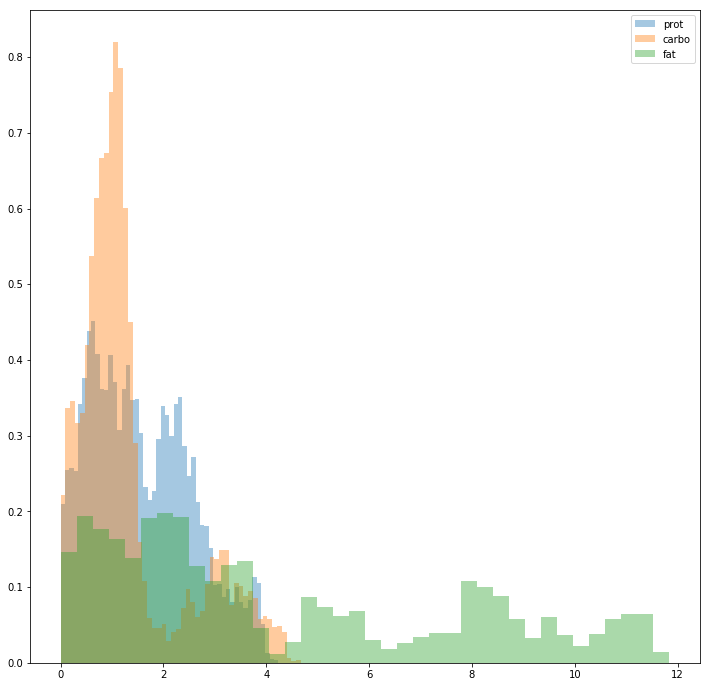

In [203]:
# If I plot all my standings, I will have the likelihood function of the mean of the data 
# (the parameter of the model that I'm inferring)
fig=plt.figure(figsize=(12, 12))
sns.distplot(all_my_standings_prot, kde=False, label="prot" , norm_hist=True)
sns.distplot(all_my_standings_carbo, kde=False, label="carbo" , norm_hist=True)
sns.distplot(all_my_standings_fat, kde=False, label="fat" , norm_hist=True)
# And I compare them with the original samples
plt.legend()
#sns.distplot(all_my_steps, kde=False)

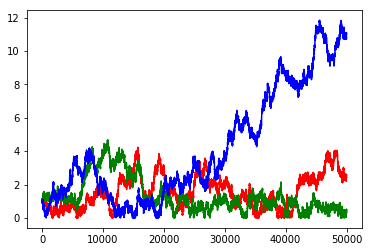

In [204]:
all_steps_prot = [a[0] for a in all_my_steps]
all_steps_carbo = [a[1] for a in all_my_steps]
all_steps_fat = [a[2] for a in all_my_steps]

plt.plot(all_my_standings_prot, color="red")
plt.plot(all_my_standings_carbo, color="green")
plt.plot(all_my_standings_fat, color="blue")